In [1]:
import pandas as pd

In [2]:
datos = pd.read_csv('data/train.csv')

In [12]:
datos.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

In [344]:
datos.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,nombre,poligonos
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0,Alvaro Obregón,"POLYGON ((-99.26899687 19.30463712, -99.269029..."
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0,Azcapotzalco,"POLYGON ((-99.26899687 19.30463712, -99.269029..."
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0,Benito Juárez,"POLYGON ((-99.26899687 19.30463712, -99.269029..."
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0,Coyoacán,"POLYGON ((-99.26899687 19.30463712, -99.269029..."
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0,Cuajimalpa de Morelos,"POLYGON ((-99.26899687 19.30463712, -99.269029..."


In [14]:
datos['provincia'].value_counts()

Distrito Federal         58790
Edo. de México           41607
Jalisco                  21238
Querétaro                16988
Nuevo León               15324
Puebla                   10421
San luis Potosí           8447
Yucatán                   7928
Morelos                   7337
Veracruz                  5762
Quintana Roo              4756
Chihuahua                 4590
Coahuila                  3695
Baja California Norte     3220
Sonora                    2988
Guanajuato                2860
Guerrero                  2678
Hidalgo                   2521
Michoacán                 2471
Tamaulipas                2303
Durango                   2275
Sinaloa                   1806
Aguascalientes            1753
Baja California Sur       1700
Nayarit                   1352
Chiapas                   1126
Colima                    1008
Tabasco                    994
Tlaxcala                   839
Oaxaca                     711
Campeche                   263
Zacatecas                   94
Name: pr

In [3]:
distritoFederal = datos[['ciudad', 'provincia', 'metrostotales', 'precio']]
distritoFederal = distritoFederal[distritoFederal['provincia'] == 'Distrito Federal']
distritoFederal['precio_metrocuadrado'] = distritoFederal['precio'] / distritoFederal['metrostotales']
distritoFederal = distritoFederal[['ciudad', 'precio_metrocuadrado']]
distritoFederal = distritoFederal.dropna()
distritoFederal = distritoFederal.loc[distritoFederal['ciudad'] != 'otra']
distritoFederal = distritoFederal.rename(columns={'ciudad': 'municipio'})
distritoFederal = distritoFederal.groupby(['municipio']).mean().reset_index()
distritoFederal

,municipio,precio_metrocuadrado
0,Alvaro Obregón,26846.670760
1,Azcapotzalco,17388.687380
2,Benito Juárez,28585.369820
3,Coyoacán,22885.185902
4,Cuajimalpa de Morelos,27297.531554
5,Cuauhtémoc,29636.534016
6,Gustavo A. Madero,17288.186034
7,Iztacalco,16863.360456
8,Iztapalapa,14421.553231
9,La Magdalena Contreras,22928.145532


In [32]:
import folium, json
from shapely.geometry import Polygon
import geopandas as gpd

In [49]:
delimitaciones = []

#Alvaro Obregón
delimitaciones.append(Polygon([ [ -99.189418161102537, 19.395595592064957 ], [ -99.171667526798927, 19.359403985274394 ], [ -99.205583917343318, 19.305753110886375 ], [ -99.205900892955881, 19.305753110886375 ], [ -99.220164795521271, 19.312118468864615 ], [ -99.208436697856399, 19.33594309444031 ], [ -99.254715137290788, 19.326849725899969 ], [ -99.286095722934661, 19.270652708320654 ], [ -99.322230942766993, 19.232460560451216 ], [ -99.324449772054948, 19.232460560451216 ], [ -99.311136796327247, 19.306662447740408 ], [ -99.303212406013131, 19.310845397268967 ], [ -99.259786747091823, 19.347946340913563 ], [ -99.25946977147926, 19.347946340913563 ], [ -99.259786747091823, 19.347946340913563 ], [ -99.260420698316949, 19.347946340913563 ], [ -99.247741673814375, 19.385956621412195 ], [ -99.189418161102537, 19.395595592064957 ] ]))

#Azcapotzalco
delimitaciones.append(Polygon([ [ -99.157403624233538, 19.502897340840995 ], [ -99.143456697280712, 19.465068927713173 ], [ -99.163743136484825, 19.456339293914443 ], [ -99.20685181979357, 19.471070550949797 ], [ -99.213825283269983, 19.497077584975177 ], [ -99.20463299050563, 19.514900587314248 ], [ -99.157403624233538, 19.502897340840995 ] ]))

#Benito Juárez
delimitaciones.append(Polygon([ [ -99.171667526798927, 19.359403985274394 ], [ -99.189418161102537, 19.395595592064957 ], [ -99.170399624348676, 19.399596674222707 ], [ -99.136483233804285, 19.402688419526424 ], [ -99.135532306966596, 19.377226987613465 ], [ -99.139969965542491, 19.356857842083098 ], [ -99.171667526798927, 19.359403985274394 ] ]))

#Coyoacán
delimitaciones.append(Polygon([ [ -99.171667526798927, 19.359403985274394 ], [ -99.139969965542491, 19.356857842083098 ], [ -99.099397087134264, 19.320484367921729 ], [ -99.100981965197079, 19.299933355020556 ], [ -99.205583917343318, 19.305753110886375 ], [ -99.205900892955881, 19.305753110886375 ], [ -99.205583917343318, 19.305753110886375 ], [ -99.171667526798927, 19.359403985274394 ] ]))

#Cuajimalpa de Morelos
delimitaciones.append(Polygon([ [ -99.255983039741054, 19.403415889009651 ], [ -99.247741673814375, 19.385956621412195 ], [ -99.260420698316949, 19.347946340913563 ], [ -99.259786747091823, 19.347946340913563 ], [ -99.25946977147926, 19.347946340913563 ], [ -99.259786747091823, 19.347946340913563 ], [ -99.303212406013131, 19.310845397268967 ], [ -99.311136796327247, 19.306662447740408 ], [ -99.324449772054948, 19.232460560451216 ], [ -99.339347625845477, 19.267560963016937 ], [ -99.365339626075752, 19.27774553578212 ], [ -99.356464308923947, 19.303206967695079 ], [ -99.32920440624342, 19.352129290442122 ], [ -99.255983039741054, 19.403415889009651 ] ]))

#Cuauhtémoc
delimitaciones.append(Polygon([ [ -99.163743136484825, 19.456339293914443 ], [ -99.143456697280712, 19.465068927713173 ], [ -99.122219331238895, 19.459612906588966 ], [ -99.125706062977102, 19.404325225863687 ], [ -99.136483233804285, 19.402688419526424 ], [ -99.170399624348676, 19.399596674222707 ], [ -99.184346551301502, 19.407780705909015 ], [ -99.163743136484825, 19.456339293914443 ] ]))

#Gustavo A. Madero
delimitaciones.append(Polygon([ [ -99.118098648275563, 19.590557413569897 ], [ -99.112710062861964, 19.573098145972438 ], [ -99.130777672778137, 19.535997202327842 ], [ -99.090521769982459, 19.509262698819235 ], [ -99.064212794139621, 19.49871439131244 ], [ -99.051216794024484, 19.449973935936203 ], [ -99.122219331238895, 19.459612906588966 ], [ -99.143456697280712, 19.465068927713173 ], [ -99.157403624233538, 19.502897340840995 ], [ -99.1764221609874, 19.531996120170092 ], [ -99.143773672893275, 19.572370676489211 ], [ -99.12380420930171, 19.592739822019578 ], [ -99.118098648275563, 19.590557413569897 ] ]))

#Iztacalco
delimitaciones.append(Polygon([ [ -99.055654452600379, 19.422148228202758 ], [ -99.058190257500897, 19.400687878447549 ], [ -99.061043038013977, 19.382319273996057 ], [ -99.135532306966596, 19.377226987613465 ], [ -99.136483233804285, 19.402688419526424 ], [ -99.125706062977102, 19.404325225863687 ], [ -99.055654452600379, 19.422148228202758 ] ]))

#Iztapalapa
delimitaciones.append(Polygon([ [ -99.058190257500897, 19.400687878447549 ], [ -98.991942354474943, 19.367588016960703 ], [ -98.974508695783911, 19.337034298665152 ], [ -98.96056176883107, 19.325394786933515 ], [ -99.001451622851874, 19.327031593270775 ], [ -99.054386550150127, 19.311572866752194 ], [ -99.068967428328079, 19.284838363243587 ], [ -99.099397087134264, 19.320484367921729 ], [ -99.139969965542491, 19.356857842083098 ], [ -99.135532306966596, 19.377226987613465 ], [ -99.061043038013977, 19.382319273996057 ], [ -99.058190257500897, 19.400687878447549 ] ]))

#La Magdalena Contreras
delimitaciones.append(Polygon([ [ -99.248058649426937, 19.246646215374149 ], [ -99.277220405782856, 19.214637558112145 ], [ -99.315891430515705, 19.227368274068624 ], [ -99.322230942766993, 19.232460560451216 ], [ -99.286095722934661, 19.270652708320654 ], [ -99.254715137290788, 19.326849725899969 ], [ -99.208436697856399, 19.33594309444031 ], [ -99.220164795521271, 19.312118468864615 ], [ -99.243304015238479, 19.291749323334248 ], [ -99.248058649426937, 19.246646215374149 ] ]))

#Miguel Hidalgo
delimitaciones.append(Polygon([ [ -99.163743136484825, 19.456339293914443 ], [ -99.184346551301502, 19.407780705909015 ], [ -99.170399624348676, 19.399596674222707 ], [ -99.189418161102537, 19.395595592064957 ], [ -99.247741673814375, 19.385956621412195 ], [ -99.255983039741054, 19.403415889009651 ], [ -99.239817283500273, 19.41214552280838 ], [ -99.208753673468962, 19.469797479354149 ], [ -99.20685181979357, 19.471070550949797 ], [ -99.163743136484825, 19.456339293914443 ] ]))

#Milpa Alta
delimitaciones.append(Polygon([ [ -98.968486159145186, 19.210636475954395 ], [ -98.955173183417486, 19.173899267051411 ], [ -98.957708988317989, 19.122430801113076 ], [ -98.978946354359806, 19.07423594784926 ], [ -99.029345476757541, 19.085147990097671 ], [ -99.061993964851666, 19.048774515936302 ], [ -99.125389087364539, 19.062050834005202 ], [ -99.135532306966596, 19.08933093962623 ], [ -99.136483233804285, 19.08933093962623 ], [ -99.163743136484825, 19.11752038210129 ], [ -99.149796209531985, 19.159713612128478 ], [ -99.130143721552997, 19.152620784667011 ], [ -99.104785672547848, 19.198451362110337 ], [ -99.094959428558354, 19.211363945437622 ], [ -99.03029640359523, 19.22354905928168 ], [ -98.968486159145186, 19.210636475954395 ] ]))

#Tlalpan
delimitaciones.append(Polygon([ [ -99.100981965197079, 19.299933355020556 ], [ -99.141237867992757, 19.282110352681485 ], [ -99.152648990045066, 19.220275446607157 ], [ -99.129192794715308, 19.202998046380507 ], [ -99.130143721552997, 19.152620784667011 ], [ -99.149796209531985, 19.159713612128478 ], [ -99.163743136484825, 19.11752038210129 ], [ -99.136483233804285, 19.08933093962623 ], [ -99.227138258997698, 19.096060032346081 ], [ -99.279122259458248, 19.131706037024223 ], [ -99.307016113363915, 19.210818343325201 ], [ -99.313672601227765, 19.21900237501151 ], [ -99.315891430515705, 19.227368274068624 ], [ -99.277220405782856, 19.214637558112145 ], [ -99.248058649426937, 19.246646215374149 ], [ -99.243304015238479, 19.291749323334248 ], [ -99.220164795521271, 19.312118468864615 ], [ -99.205900892955881, 19.305753110886375 ], [ -99.205583917343318, 19.305753110886375 ], [ -99.100981965197079, 19.299933355020556 ] ]))

#Tláhuac
delimitaciones.append(Polygon([ [ -98.96056176883107, 19.325394786933515 ], [ -98.976727525071851, 19.253011573352389 ], [ -98.945980890653118, 19.224822130877328 ], [ -98.968486159145186, 19.210636475954395 ], [ -99.03029640359523, 19.22354905928168 ], [ -99.007157183878036, 19.251556634385935 ], [ -99.068967428328079, 19.284838363243587 ], [ -99.054386550150127, 19.311572866752194 ], [ -99.001451622851874, 19.327031593270775 ], [ -98.96056176883107, 19.325394786933515 ] ]))

#Venustiano Carranza
delimitaciones.append(Polygon([ [ -99.051216794024484, 19.449973935936203 ], [ -99.055654452600379, 19.422148228202758 ], [ -99.125706062977102, 19.404325225863687 ], [ -99.122219331238895, 19.459612906588966 ], [ -99.051216794024484, 19.449973935936203 ] ]))

#Xochimilco
delimitaciones.append(Polygon([ [ -99.100981965197079, 19.299933355020556 ], [ -99.099397087134264, 19.320484367921729 ], [ -99.068967428328079, 19.284838363243587 ], [ -99.007157183878036, 19.251556634385935 ], [ -99.03029640359523, 19.22354905928168 ], [ -99.094959428558354, 19.211363945437622 ], [ -99.104785672547848, 19.198451362110337 ], [ -99.130143721552997, 19.152620784667011 ], [ -99.129192794715308, 19.202998046380507 ], [ -99.152648990045066, 19.220275446607157 ], [ -99.141237867992757, 19.282110352681485 ], [ -99.100981965197079, 19.299933355020556 ] ]))

In [43]:
len(delimitaciones)

16

In [51]:
df = gpd.GeoDataFrame(distritoFederal, geometry=delimitaciones)
df

,municipio,precio_metrocuadrado,geometry
0,Alvaro Obregón,26846.670760,POLYGON ((-99.18941816110254 19.39559559206496...
1,Azcapotzalco,17388.687380,"POLYGON ((-99.15740362423354 19.502897340841, ..."
2,Benito Juárez,28585.369820,POLYGON ((-99.17166752679893 19.35940398527439...
3,Coyoacán,22885.185902,POLYGON ((-99.17166752679893 19.35940398527439...
4,Cuajimalpa de Morelos,27297.531554,POLYGON ((-99.25598303974105 19.40341588900965...
5,Cuauhtémoc,29636.534016,POLYGON ((-99.16374313648483 19.45633929391444...
6,Gustavo A. Madero,17288.186034,"POLYGON ((-99.11809864827556 19.5905574135699,..."
7,Iztacalco,16863.360456,POLYGON ((-99.05565445260038 19.42214822820276...
8,Iztapalapa,14421.553231,"POLYGON ((-99.0581902575009 19.40068787844755,..."
9,La Magdalena Contreras,22928.145532,POLYGON ((-99.24805864942694 19.24664621537415...


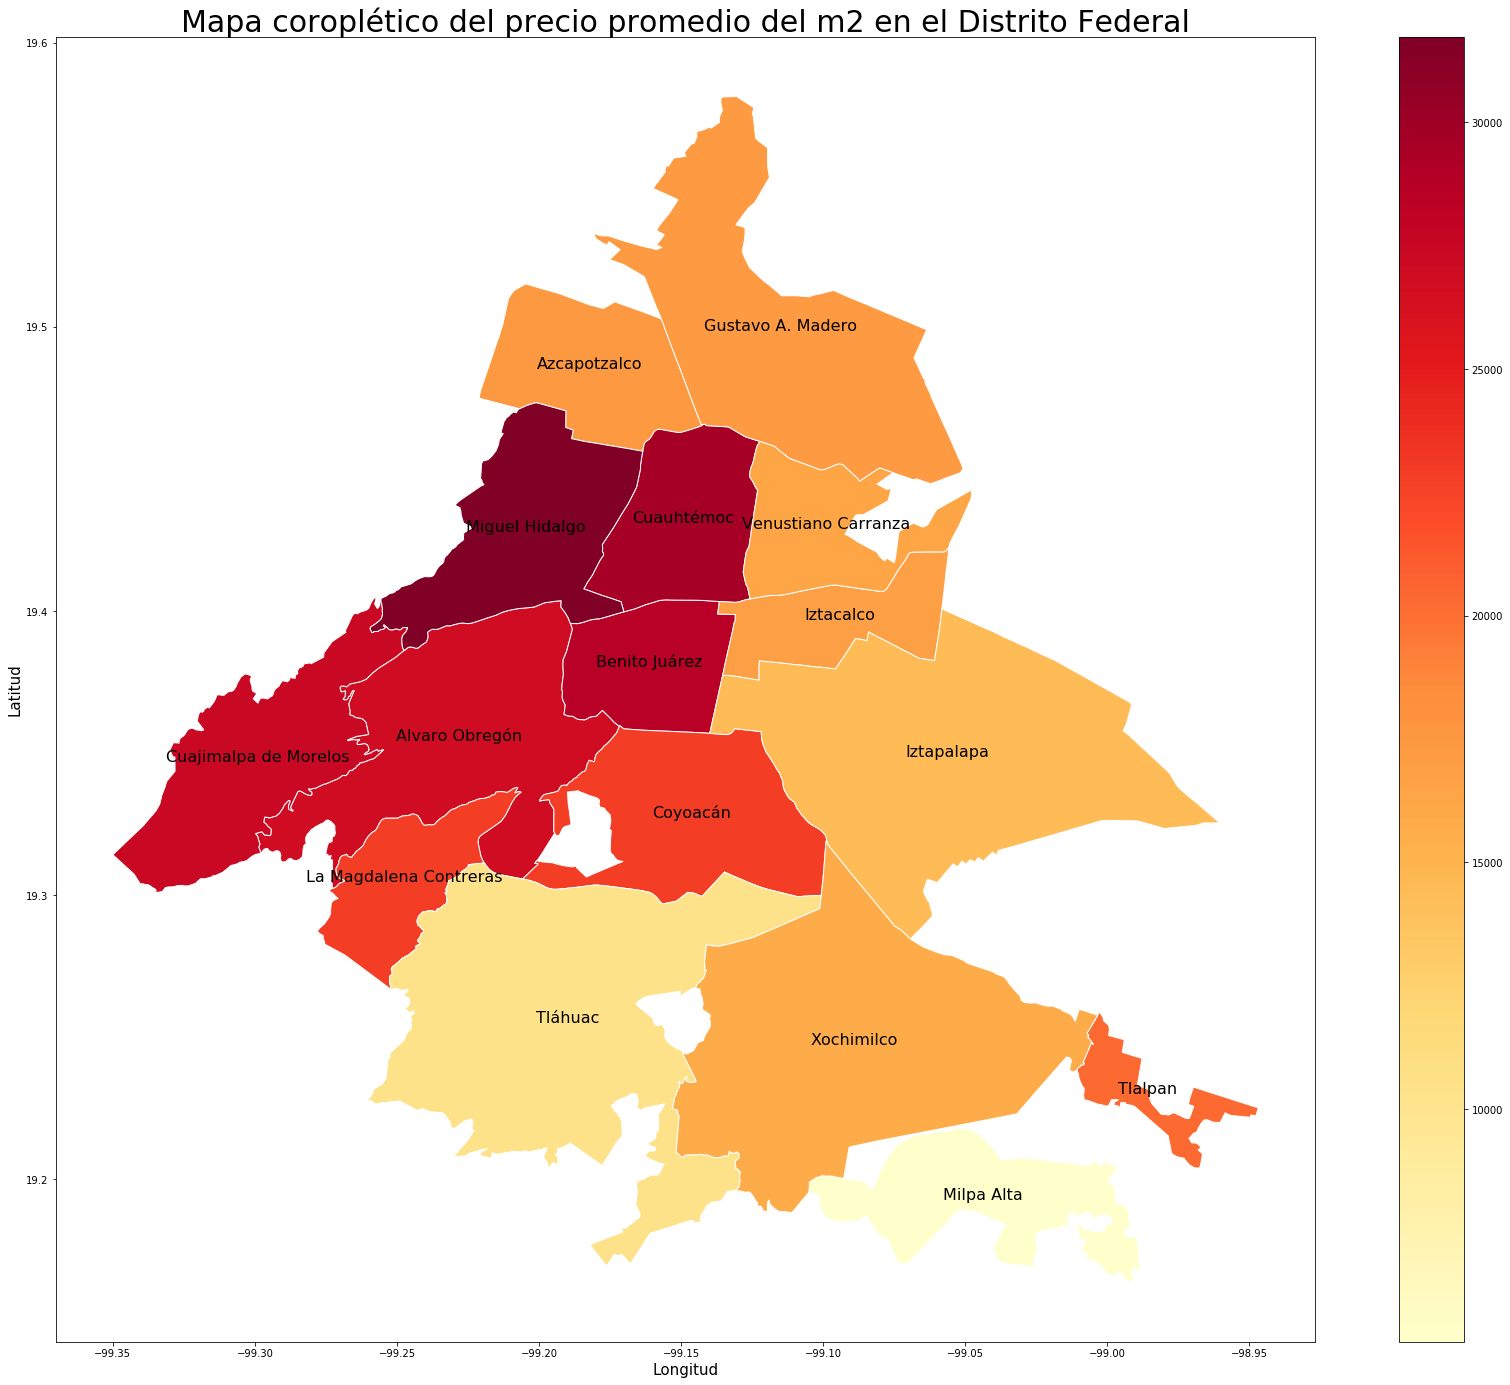

In [341]:
ax = dist.plot(column='precio_metrocuadrado', cmap='YlOrRd', figsize=(30, 24), edgecolor="white",legend=True)
ax.set_title("Mapa coroplético del precio promedio del m2 en el Distrito Federal",fontsize=30)
ax.set_xlabel("Longitud",fontsize=15)
ax.set_ylabel("Latitud",fontsize=15)
dist.apply(lambda x: ax.annotate(s=x.municipio, xy=x.geometry.centroid.coords[0], ha='center', color='black', size=16),axis=1);
ax

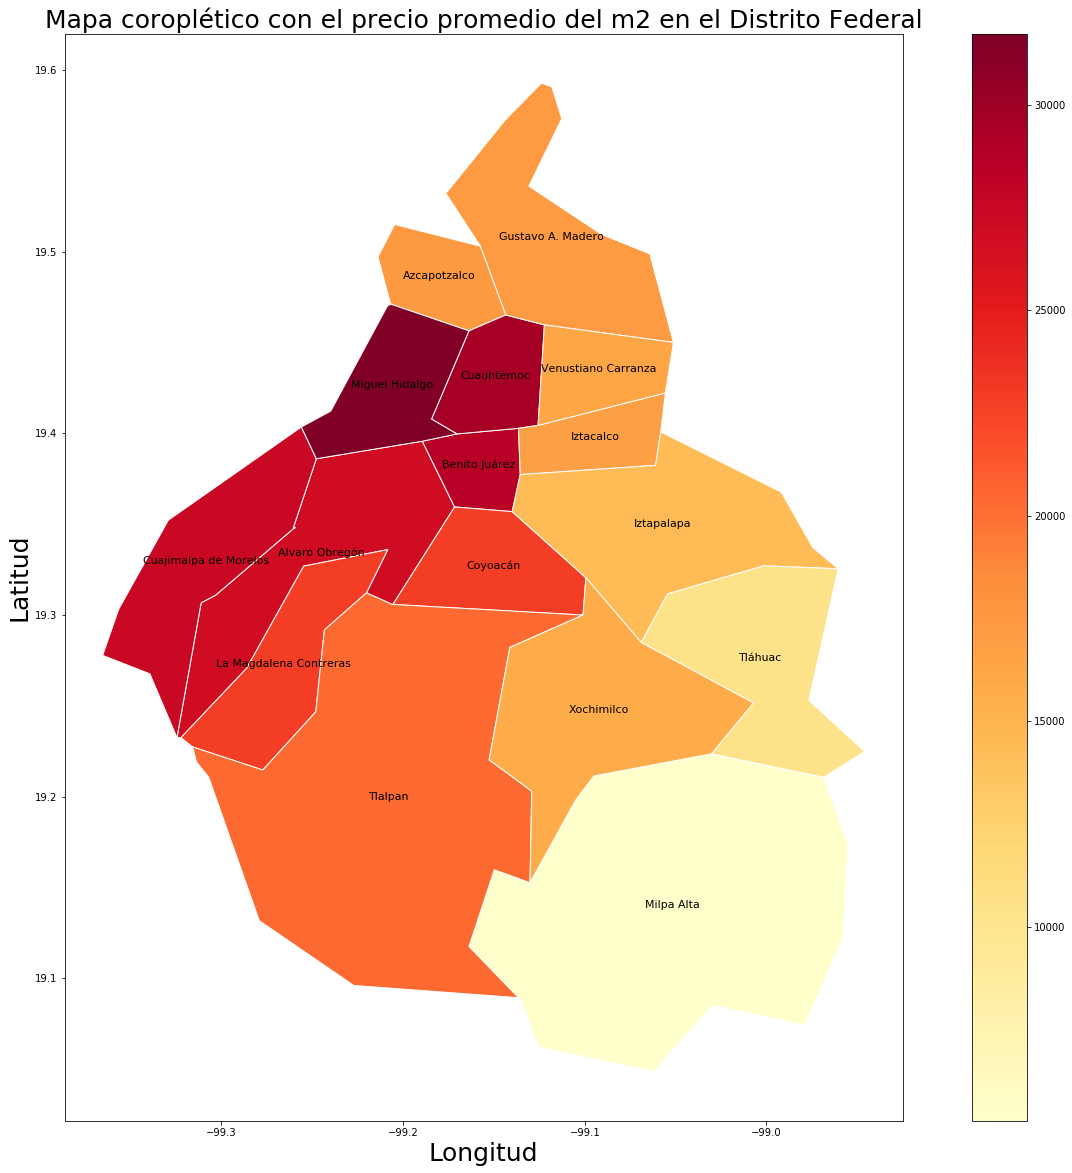

In [71]:
a = df.plot(column='precio_metrocuadrado', cmap='YlOrRd', figsize=(25, 20), edgecolor="white",legend=True)
a.set_title("Mapa coroplético con el precio promedio del m2 en el Distrito Federal",fontsize=25)
a.set_xlabel("Longitud",fontsize=25)
a.set_ylabel("Latitud",fontsize=25)
df.apply(lambda x: a.annotate(s=x.municipio, xy=x.geometry.centroid.coords[0], ha='center', color='black', size=11),axis=1);
a